## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras
from keras.datasets import cifar10

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
train, test = cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
def build_mlp(input_shape, num_outputs = 10, num_neurons = [512,256,128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i , num_input in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = num_input, activation = "relu", name = "Hidden_layer"+str(i))(input_layer)
        else:
            x = keras.layers.Dense(units = num_input, activation = "relu", name = "Hidden_layer"+str(i))(x)
    out = keras.layers.Dense(units = num_outputs, activation = "softmax", name = "Output_layer")(x)
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    return model

In [9]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.75,0.85,0.95,0.99]
nest = [False,True]

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i in nest:
    for j in MOMENTUM:
        keras.backend.clear_session()
        print(f"experiment nesterov={i}, Momentum={j}")
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        SGD = keras.optimizers.SGD(lr = LEARNING_RATE, nesterov = i, momentum = j)
        model.compile(loss = "categorical_crossentropy", optimizer=SGD, metrics=["accuracy"])
        model.fit(x_train,y_train,
                            batch_size=BATCH_SIZE,
                            epochs=EPOCHS,
                            validation_data=(x_test,y_test),
                            shuffle=True)
        
        train_loss = model.history.history["loss"]
        train_acc = model.history.history["accuracy"]
        val_loss = model.history.history["val_loss"]
        val_acc = model.history.history["val_accuracy"]

        exp_name = f"nesterov={i} and Momentum={j}"
        results[exp_name] = {"train_loss":train_loss,
                            "train_acc":train_acc,
                            "val_loss":val_loss,
                            "val_acc":val_acc}
        


experiment nesterov=False, Momentum=0.75
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 Hidden_layer0 (Dense)       (None, 512)               1573376   
                                                                 
 Hidden_layer1 (Dense)       (None, 256)               131328    
                                                                 
 Hidden_layer2 (Dense)       (None, 128)               32896     
                                                                 
 Output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


c:\Users\wei-jyun\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
196/196 [==============================] - 4s 18ms/step - loss: 2.1769 - accuracy: 0.2272 - val_loss: 2.0685 - val_accuracy: 0.2736
Epoch 2/50
196/196 [==============================] - 4s 22ms/step - loss: 2.0032 - accuracy: 0.3027 - val_loss: 1.9514 - val_accuracy: 0.3229
Epoch 3/50
196/196 [==============================] - 4s 22ms/step - loss: 1.9166 - accuracy: 0.3331 - val_loss: 1.8870 - val_accuracy: 0.3420
Epoch 4/50
196/196 [==============================] - 4s 21ms/step - loss: 1.8662 - accuracy: 0.3488 - val_loss: 1.8463 - val_accuracy: 0.3531
Epoch 5/50
196/196 [==============================] - 4s 21ms/step - loss: 1.8307 - accuracy: 0.3617 - val_loss: 1.8155 - val_accuracy: 0.3656
Epoch 6/50
196/196 [==============================] - 4s 20ms/step - loss: 1.8024 - accuracy: 0.3719 - val_loss: 1.7916 - val_accuracy: 0.3732
Epoch 7/50
196/196 [==============================] - 4s 19ms/step - loss: 1.7790 - accuracy: 0.3790 - val_loss: 1.7701 - val_accuracy: 0.3795

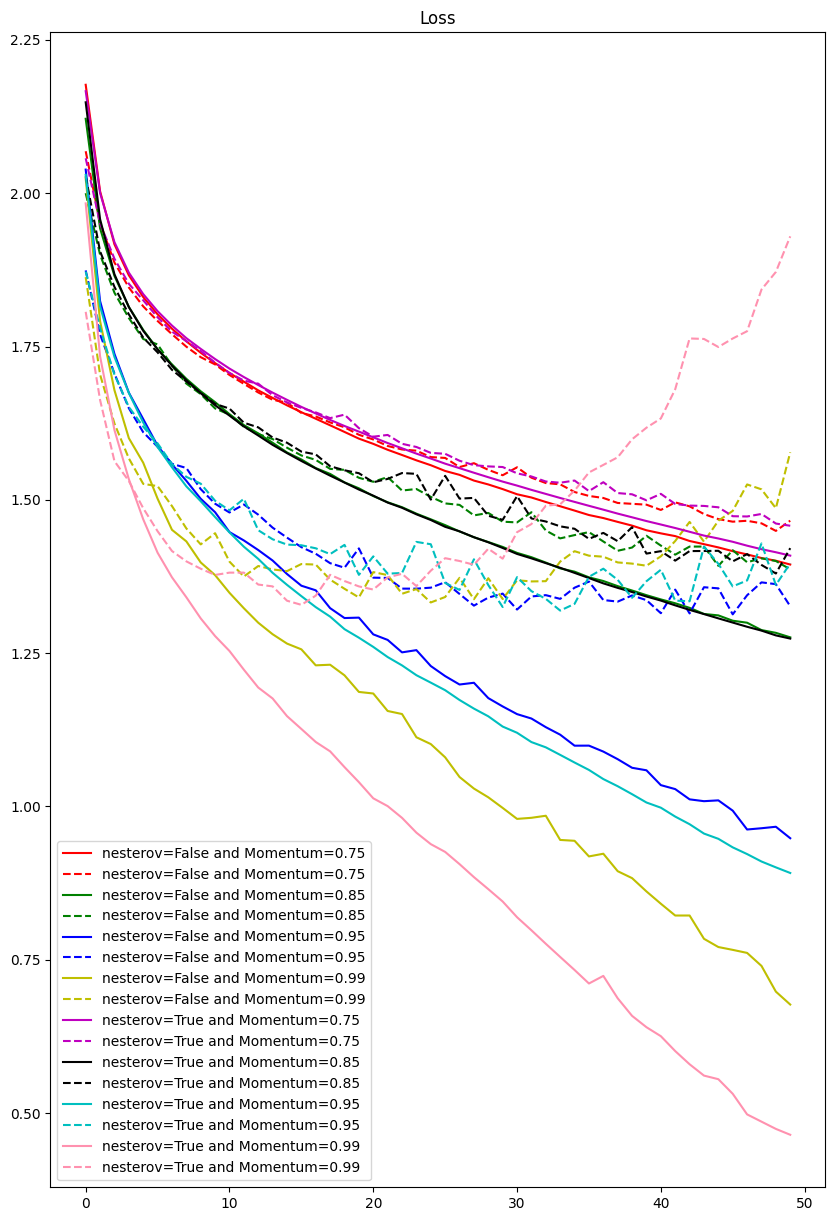

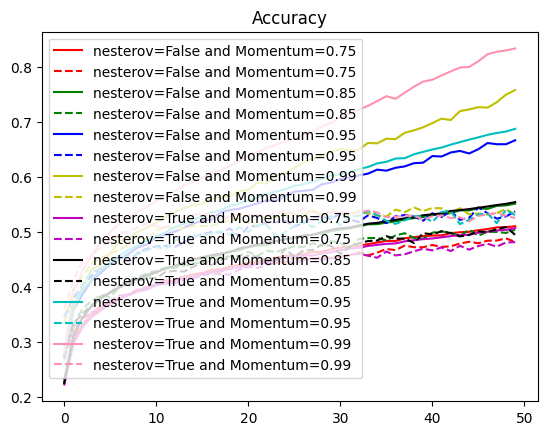

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
plt.figure(figsize=[10,15])
color_bar = ["r", "g", "b", "y", "m", "k","c","#ff91af"]

for i,keys in enumerate(results.keys()):
    plt.plot(range(len(results[keys]["train_loss"])), results[keys]["train_loss"],"-", label = keys, c=color_bar[i])
    plt.plot(range(len(results[keys]["val_loss"])), results[keys]["val_loss"], "--",label = keys, c=color_bar[i])
plt.title("Loss")
plt.legend(loc = "best")
plt.show()

for i,keys in enumerate(results.keys()):
    plt.plot(range(len(results[keys]["train_acc"])), results[keys]["train_acc"],"-", label = keys, c=color_bar[i])
    plt.plot(range(len(results[keys]["val_acc"])), results[keys]["val_acc"], "--",label = keys, c=color_bar[i])
plt.title("Accuracy")
plt.legend(loc = "best")
plt.show()